# Задача 16(вариант 3)
Решение краевой задачи для одномерного стационарного уравнения тепловопроводности.

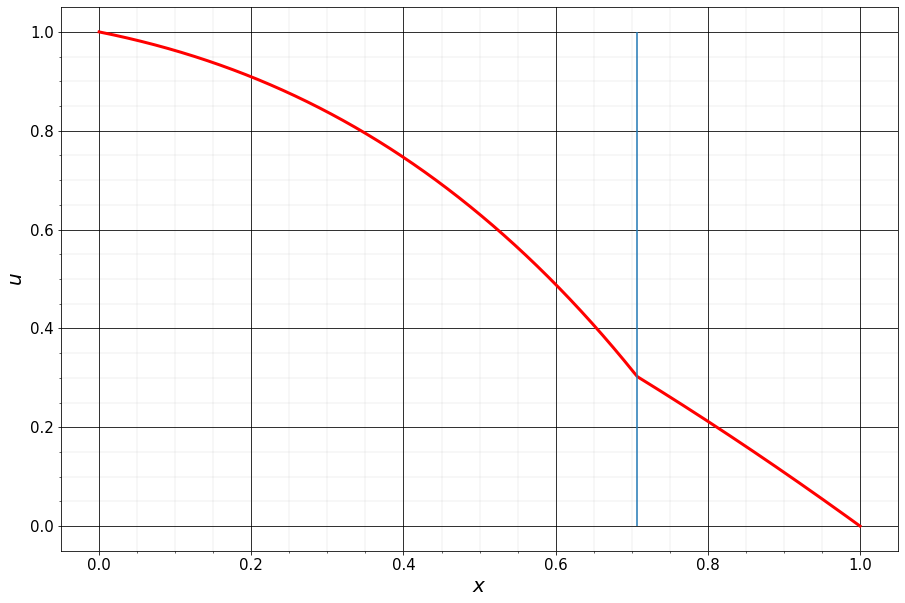

In [1]:
import numpy as np
from matplotlib import pyplot as plt

h = 1e-5
x0 = 1 / np.sqrt(2)

#кусочно-непрерывные коэффициенты:
def k(x):
    if x < x0:
        return np.exp(-x)
    else:
        return 1


def q(x):
    if x < x0:
        return x ** 2
    else:
        return np.exp(-x ** 2)


def f(x):
    if x < x0:
        return 1
    else:
        return np.cos(x)

#начальные условия:
x_start = 0
x_end = 1

u_0 = 1
u_l = 0

L = int(1 / h) # количество точек
x = np.linspace(x_start, x_end, L)
u = np.zeros(L)

u[0] = u_0
u[-1] = u_l

l_alpha = int(np.floor(x0 / h))
l_beta = l_alpha + 1

a = np.zeros(L)
b = np.zeros(L)
c = np.zeros(L)
d = np.zeros(L)
alpha = np.zeros(L)
beta  = np.zeros(L)


#прямая прогонка
for l in range(1, l_alpha):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h


for l in range(l_beta + 1, L):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h
    
# прогоночные коэффициенты в первой и предпоследней точках
alpha[1] = -a[1] / b[1]
beta[1]  = (d[1] - c[1] * u_0) / b[1]

alpha[L - 1] = -c[L - 1] / b[L - 1]
beta[L - 1]  = (d[L - 1] - c[L - 1] * u_l) / b[L - 1]


for l in range(2, l_alpha):
    alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
    beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])


for l in range(L - 2, l_beta, -1):
    alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
    beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])

u[l_alpha] = (k(l_alpha * h) * beta[l_alpha - 1] + k(l_beta * h) * beta[l_beta + 1]) / (k(l_alpha * h) * (1 - alpha[l_alpha - 1]) + k(l_beta * h) * (1 - alpha[l_beta + 1]))
u[l_beta] = u[l_alpha].copy()

u[l_alpha - 1] = alpha[l_alpha - 1] * u[l_alpha] + beta[l_alpha - 1]
u[l_beta + 1] = alpha[l_beta + 1] * u[l_beta] + beta[l_beta + 1]


#обратная прогонка
for l in range(l_alpha - 1, 0, -1):
    u[l] = alpha[l] * u[l + 1] + beta[l]

for l in range(l_beta + 1, L):
    u[l] = alpha[l] * u[l - 1] + beta[l]

plt.figure(figsize=(15, 10))
plt.plot(x, u, color='red',  linewidth=3)

plt.ticklabel_format(style='plain')

plt.minorticks_on()
plt.grid(which='major', color='black', linestyle='-')
plt.grid(which='minor', color='0.2', linestyle='--', linewidth=0.1)

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$u$', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.vlines(x0, min(u), max(u)) #Линия разрыва

plt.show()

Рисунок: Красным обозначен график решения, а синим - линия(точка) разрыва.

# Вывод
В работе был реализован метод встречных прогонок(прямой и обратный указаны комментариями в работе) для решения краевой задачи для одномерного стационарного уравнения тепловпроводности с кусочно-непрерывными коэффициентами.   